In [281]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI_Workshops/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI_Workshops


In [282]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [283]:
# Load the dataset and display the first 10 rows
whr_daf = pd.read_csv("Datasets/WHR.csv")
whr_daf.head(10)
display(whr_daf.describe( ))

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [284]:
#  Identify the number of rows and columns in the dataset.
whr_daf.shape

(143, 9)

In [285]:
# 3. List all the columns and their data types.
whr_daf.dtypes



,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [286]:
# 1. Calculate the mean, median, and standard deviation for the Score column

whr_daf['score'].agg(['mean', 'median', 'std'])

,score
mean,5.527580
median,5.785000
std,1.170717


In [287]:
# 2. Identify the country with the highest and lowest happiness scores
print(f"Happiest country is {whr_daf.loc[whr_daf['score'].idxmax(), 'Country name']} and the unhappiest is {whr_daf.loc[whr_daf['score'].idxmin(), 'Country name']}")


Happiest country is Finland and the unhappiest is Afghanistan


In [288]:
# Missing Values:
display(whr_daf.isna().sum())

# treating missing
whr_daf = whr_daf.apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x.fillna(x.mode()[0]), axis=0)

display(whr_daf.isna().sum())


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


,0
Country name,0
score,0
Log GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Dystopia + residual,0


In [289]:
# 3 Filter the dataset to show only the countries with a Score greater than 7.5
filtered_grt = whr_daf.query('score > 7.5')
filtered_grt

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [290]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

dsc_filtered_grt = filtered_grt.sort_values(by='Log GDP per capita',ascending=False)
dsc_filtered_grt

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [291]:
# reate a new column called Happiness Category that categorizes countries into three categories based on their Score:
whr_daf_categorized = whr_daf.copy()
whr_daf_categorized['Happiness_Category'] = whr_daf_categorized['score'].apply(
    lambda x: 'Low' if x < 4 else 'Medium' if x <= 6 else 'High'
)
whr_daf_categorized.groupby('Happiness_Category').count()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Happiness_Category,,,,,,,,,
High,56,56,56,56,56,56,56,56,56
Low,17,17,17,17,17,17,17,17,17
Medium,70,70,70,70,70,70,70,70,70


Text(0, 0.5, 'Country name')

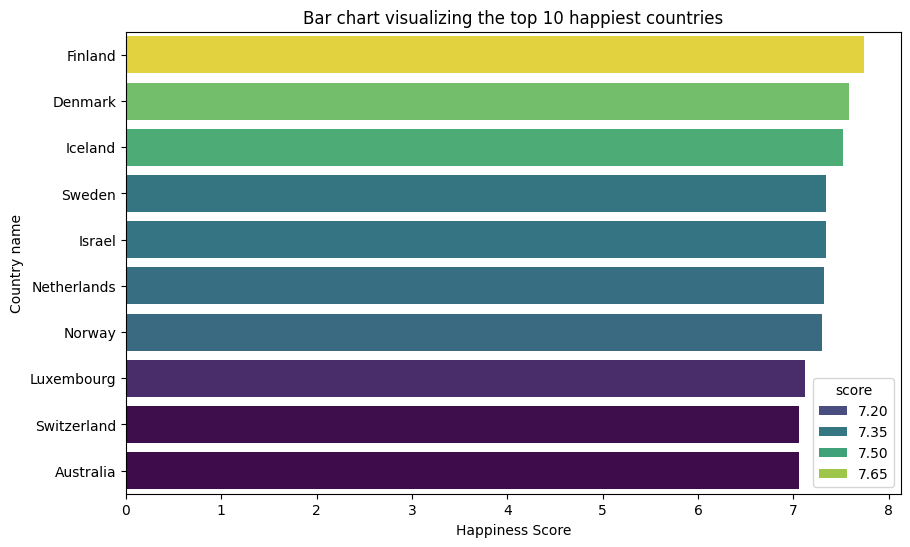

In [292]:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart
whr_daf_categorized_sorted = whr_daf_categorized.sort_values(by='score',ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(data=whr_daf_categorized_sorted.head(10), x='score', y='Country name', hue='score',palette='viridis')
plt.title('Bar chart visualizing the top 10 happiest countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')

Text(0.5, 0, 'Country name')

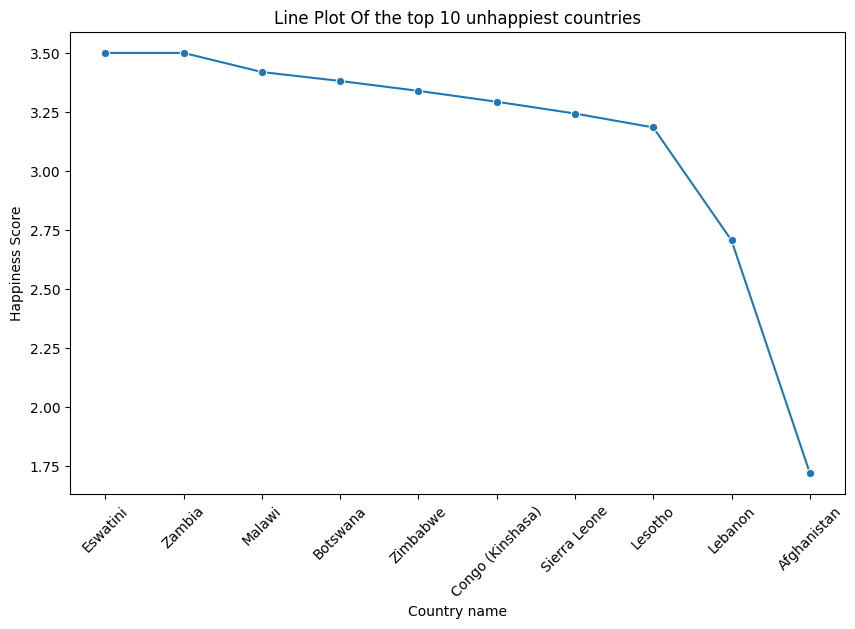

In [293]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sb.lineplot(data=whr_daf_categorized_sorted.tail(10),x='Country name',y='score',marker='o')
plt.title('Line Plot Of the top 10 unhappiest countries')
plt.ylabel('Happiness Score')
plt.xlabel('Country name')

Text(0.5, 0, 'Happiness Score')

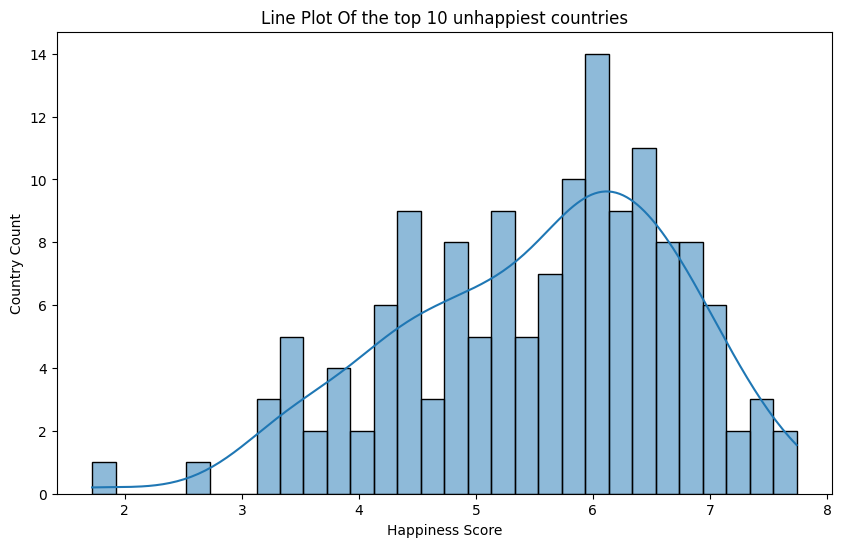

In [294]:
# Plot a histogram for the Score column to show its distribution and also interpret

plt.figure(figsize=(10,6))
sb.histplot(whr_daf_categorized['score'],kde=True, bins=30)
plt.title('Distribution visualization via Histogram for the Happiness Score')
plt.title('Line Plot Of the top 10 unhappiest countries')
plt.ylabel('Country Count')
plt.xlabel('Happiness Score')


Text(0.5, 0, 'Happiness Score')

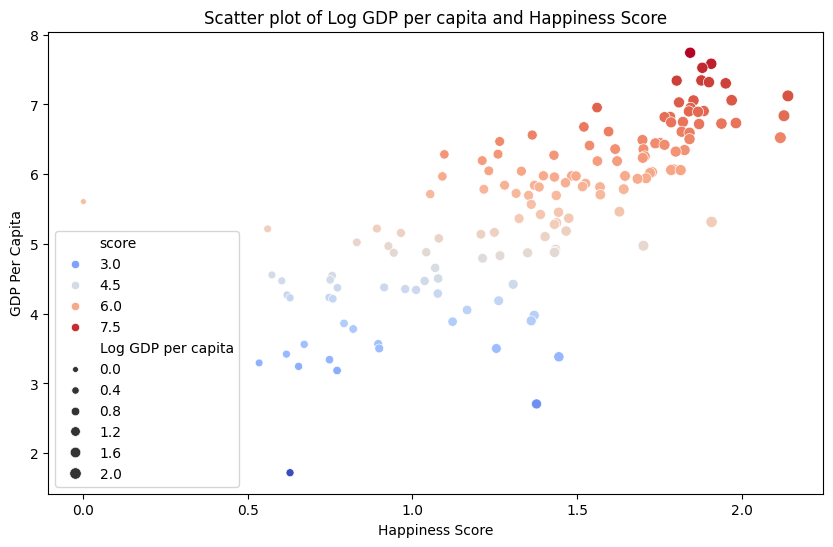

In [295]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship
plt.figure(figsize=(10,6))
sb.scatterplot(data=whr_daf_categorized,x='Log GDP per capita',y='score',hue='score',palette='coolwarm',size='Log GDP per capita')
plt.title('Scatter plot of Log GDP per capita and Happiness Score')
plt.ylabel('GDP Per Capita')
plt.xlabel('Happiness Score')

In [296]:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]


south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]



In [353]:
# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

whr_daf_categorized_sa = whr_daf_categorized.query('`Country name` in @south_asian_countries')
display(whr_daf_categorized_sa.transpose())


missing_countries = [country for country in south_asian_countries if country not in whr_daf_categorized_sa['Country name'].values]

numeric_columns = whr_daf_categorized_sa.select_dtypes(include=['float64']).columns
happiness_category_mode = whr_daf_categorized_sa['Happiness_Category'].mode()[0]


for country in missing_countries:
    median_values = whr_daf_categorized_sa[numeric_columns].median()
    new_row = median_values.to_dict()
    new_row['Country name'] = country
    new_row['Happiness_Category'] = happiness_category_mode
    new_row_df = pd.DataFrame([new_row])

    whr_daf_categorized_sa = pd.concat([whr_daf_categorized_sa, new_row_df], ignore_index=True)

display(whr_daf_categorized_sa.transpose())

whr_daf_categorized_sa.describe()

,92,107,125,128,142
Country name,Nepal,Pakistan,India,Bangladesh,Afghanistan
score,5.158,4.657,4.054,3.886,1.721
Log GDP per capita,0.965,1.069,1.166,1.122,0.628
Social support,0.99,0.6,0.653,0.249,0.0
Healthy life expectancy,0.443,0.321,0.417,0.513,0.242
Freedom to make life choices,0.653,0.542,0.767,0.775,0.0
Generosity,0.209,0.144,0.174,0.14,0.091
Perceptions of corruption,0.115,0.074,0.122,0.167,0.088
Dystopia + residual,1.783,1.907,0.756,0.919,0.672
Happiness_Category,Medium,Medium,Medium,Low,Low


,0,1,2,3,4,5,6,7
Country name,Nepal,Pakistan,India,Bangladesh,Afghanistan,Bhutan,Maldives,Srilanka
score,5.158,4.657,4.054,3.886,1.721,4.054,4.054,4.054
Log GDP per capita,0.965,1.069,1.166,1.122,0.628,1.069,1.069,1.069
Social support,0.99,0.6,0.653,0.249,0.0,0.6,0.6,0.6
Healthy life expectancy,0.443,0.321,0.417,0.513,0.242,0.417,0.417,0.417
Freedom to make life choices,0.653,0.542,0.767,0.775,0.0,0.653,0.653,0.653
Generosity,0.209,0.144,0.174,0.14,0.091,0.144,0.144,0.144
Perceptions of corruption,0.115,0.074,0.122,0.167,0.088,0.115,0.115,0.115
Dystopia + residual,1.783,1.907,0.756,0.919,0.672,0.919,0.919,0.919
Happiness_Category,Medium,Medium,Medium,Low,Low,Medium,Medium,Medium


,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.954750,1.019625,0.536500,0.398375,0.587000,0.148750,0.113875,1.099250
std,0.998194,0.168189,0.294194,0.081904,0.248355,0.033316,0.027132,0.470607
min,1.721000,0.628000,0.000000,0.242000,0.000000,0.091000,0.074000,0.672000
25%,4.012000,1.043000,0.512250,0.393000,0.625250,0.143000,0.108250,0.878250
50%,4.054000,1.069000,0.600000,0.417000,0.653000,0.144000,0.115000,0.919000
75%,4.204750,1.082250,0.613250,0.423500,0.681500,0.151500,0.116750,1.135000
max,5.158000,1.166000,0.990000,0.513000,0.775000,0.209000,0.167000,1.907000


In [298]:
# Save the filtered dataframe as separate CSV files for future use
whr_daf_categorized_sa.to_csv('Datasets/south_asian_health_report.csv',index=False)

In [299]:
#  1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics

whr_sa = pd.read_csv('Datasets/south_asian_health_report.csv')

whr_sa['Composite Score'] = (whr_sa['Log GDP per capita'] * 0.40 +  whr_sa['Social support'] * 0.30 +  whr_sa['Healthy life expectancy'] * 0.30)

whr_sa[['Country name', 'Composite Score']]

,Country name,Composite Score
0,Nepal,0.8159
1,Pakistan,0.7039
2,India,0.7874
3,Bangladesh,0.6774
4,Afghanistan,0.3238
5,Bhutan,0.7327
6,Maldives,0.7327
7,Srilanka,0.7327


In [365]:
# Rank the South Asian countries based on the Composite Score in descending orde
whr_sa_sorted = whr_sa.sort_values('Composite Score',ascending=False)
display(whr_sa_sorted)


whr_sa_sorted_with_happinessscore = whr_sa.sort_values('score',ascending=False)
display(whr_sa_sorted_with_happinessscore)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
5,Bhutan,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
6,Maldives,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
5,Bhutan,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
6,Maldives,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


Text(0.5, 1.0, 'Visualization of the Composite Score of south asian Countries ')

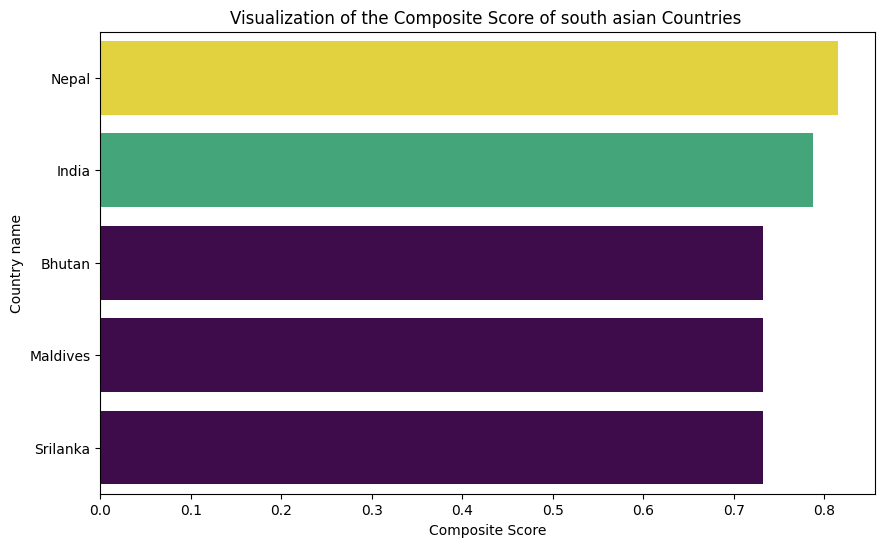

In [301]:
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
plt.figure(figsize=(10,6))
ax = sb.barplot(data=whr_sa_sorted.head(5),x='Composite Score',y='Country name',hue='Composite Score',palette='viridis',orient='horizontal')
ax.legend_.remove()
plt.title("Visualization of the Composite Score of south asian Countries ")

Text(0, 0.5, 'Composite Score')

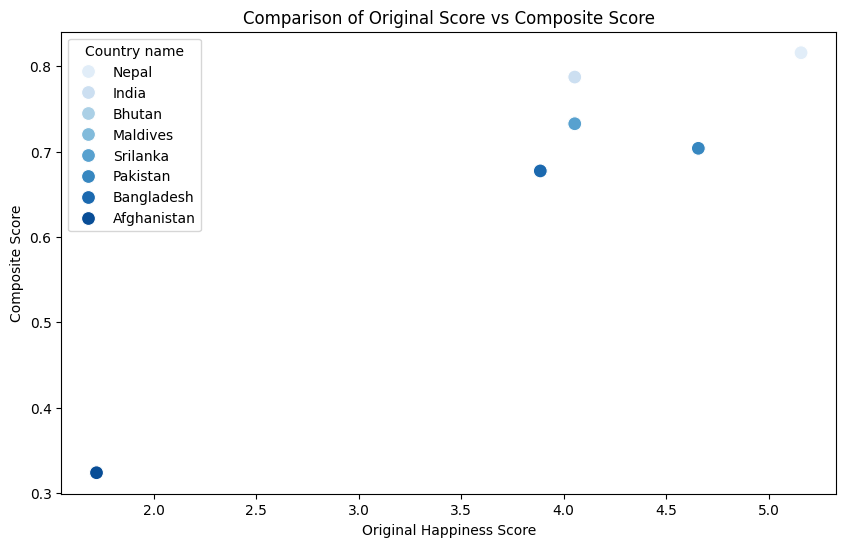

In [364]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=whr_sa_sorted, x='score', y='Composite Score', hue='Country name', palette='Blues', s=100)
plt.title("Comparison of Original Score vs Composite Score")
plt.xlabel("Original Happiness Score")
plt.ylabel("Composite Score")

# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot

Text(0.5, 0, 'Countries')

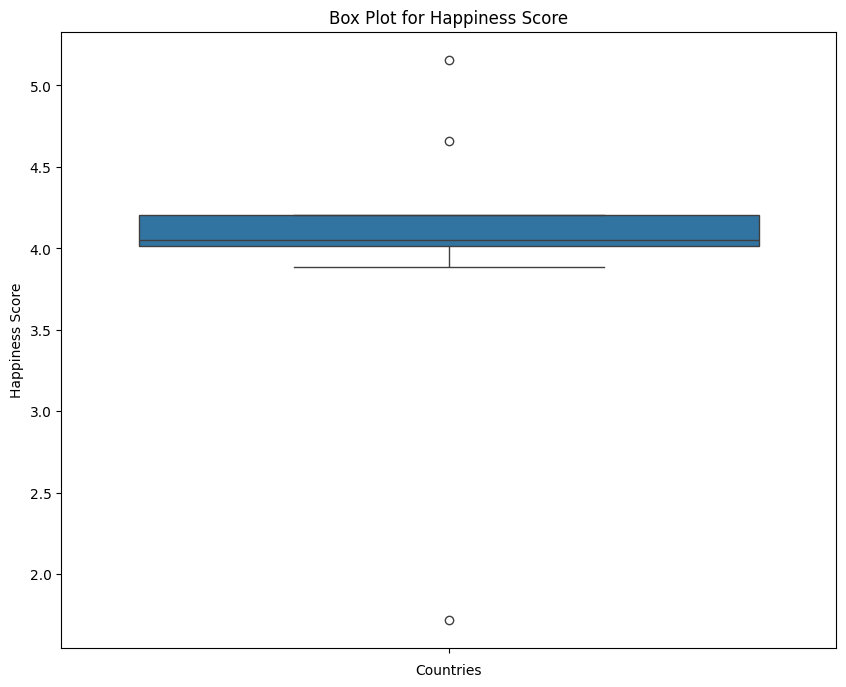

In [302]:
plt.figure(figsize=(10,8))
sb.boxplot(data=whr_sa_sorted, y='score')
plt.title('Box Plot for Happiness Score')
plt.ylabel('Happiness Score')
plt.xlabel('Countries')

Text(0.5, 1.0, 'Box Plot for GDP Per capita')

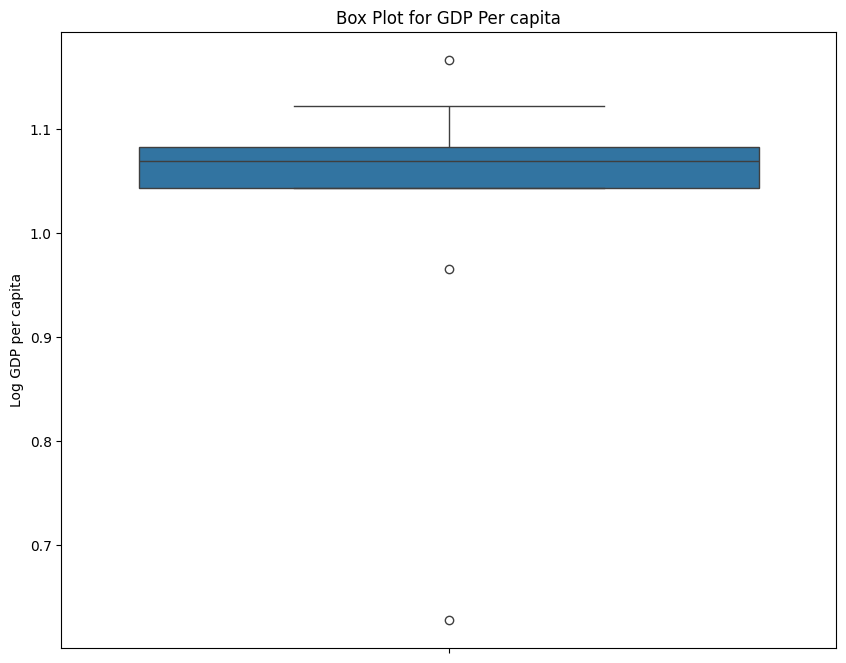

In [303]:
plt.figure(figsize=(10,8))
sb.boxplot(data=whr_sa_sorted, y='Log GDP per capita')
plt.title('Box Plot for GDP Per capita')

In [304]:
def find_outliers(datafr, cols):
    outliers = []

    for col in cols:
        Q1 = datafr[col].quantile(0.25)
        Q3 = datafr[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outlier = datafr.query(f"`{col}` < {lower_bound} or `{col}` > {upper_bound}")

        if not col_outlier.empty:
            outliers.extend(col_outlier['Country name'].tolist()) # append was causing problems as in it was causing an array of arrays to be append
            # extend flattens it out

    #set(outliers) to remove any dupliacates
    return list(set(outliers))


outliers_sa= find_outliers(whr_sa_sorted, ['Composite Score', 'Log GDP per capita'])
outliers_sa_df = whr_sa_sorted.query('`Country name` in @outliers_sa')
outliers_sa_df['Country name']


,Country name
0,Nepal
2,India
4,Afghanistan


Text(0, 0.5, 'Composite Score')

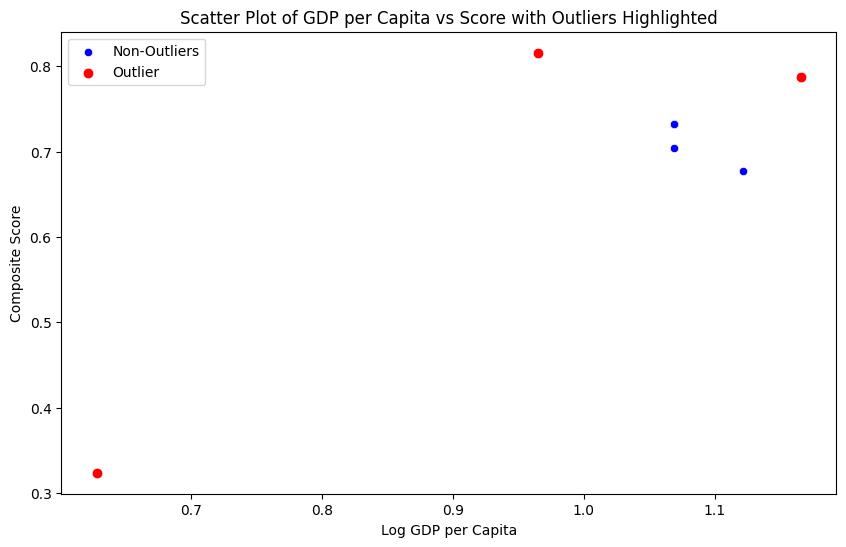

In [305]:
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color

plt.figure(figsize=(10,6))
sb.scatterplot(data=whr_sa_sorted, x='Log GDP per capita', y='Composite Score', color='blue', label='Non-Outliers')

sb.scatterplot(data=outliers_sa_df, x='Log GDP per capita', y='Composite Score', color='red',label='Outlier',s=60)

plt.title('Scatter Plot of GDP per Capita vs Score with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Composite Score')


# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

,Freedom to make life choices,Generosity,score
Freedom to make life choices,1.000000,0.691469,0.797314
Generosity,0.691469,1.000000,0.858518
score,0.797314,0.858518,1.000000


<Axes: title={'center': 'Correlation Heatmap'}>

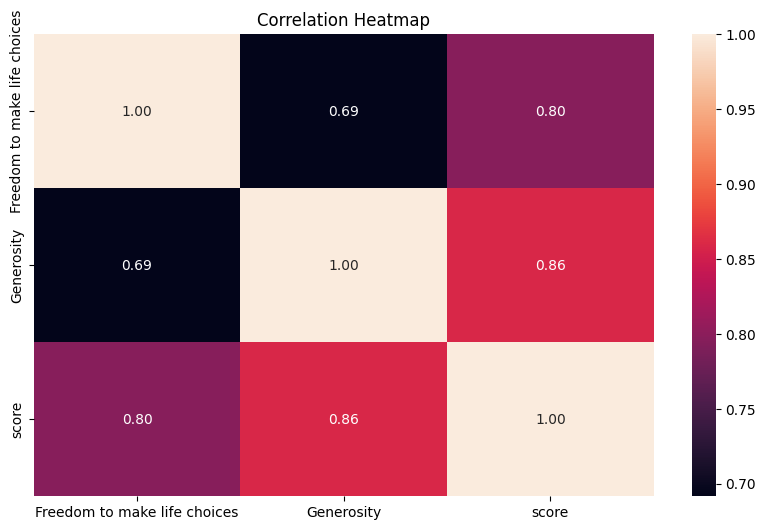

In [306]:
#1. choose two metrics (e.g., freedom to make life choices and generosity) and calculate their correlation {pearson correlation} with the score for south asian countries.
whr_sa_sorted.columns
correlations = whr_sa_sorted[['Freedom to make life choices', 'Generosity', 'score']].corr()
display(correlations)
plt.figure(figsize=(10, 6))
plt.xticks(rotation=0)
plt.title('Correlation Heatmap')
sb.heatmap(correlations, annot=True, fmt=".2f")


Text(0, 0.5, 'Freedom to Make Life Choices')

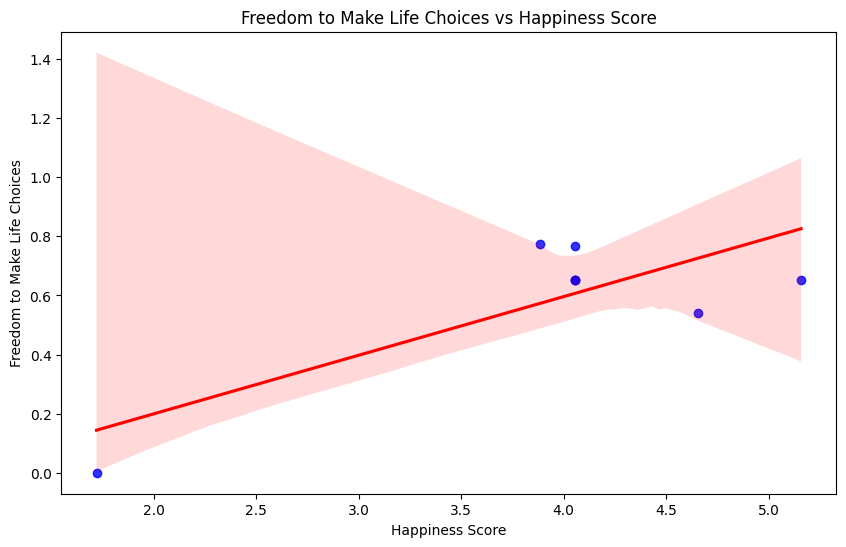

In [307]:
# Create scatter plots with trendlines for these metrics against the Score

plt.figure(figsize=(10,6))
sb.regplot(data=whr_sa_sorted, x='score', y='Freedom to make life choices', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to Make Life Choices')

Text(0, 0.5, 'Generosity')

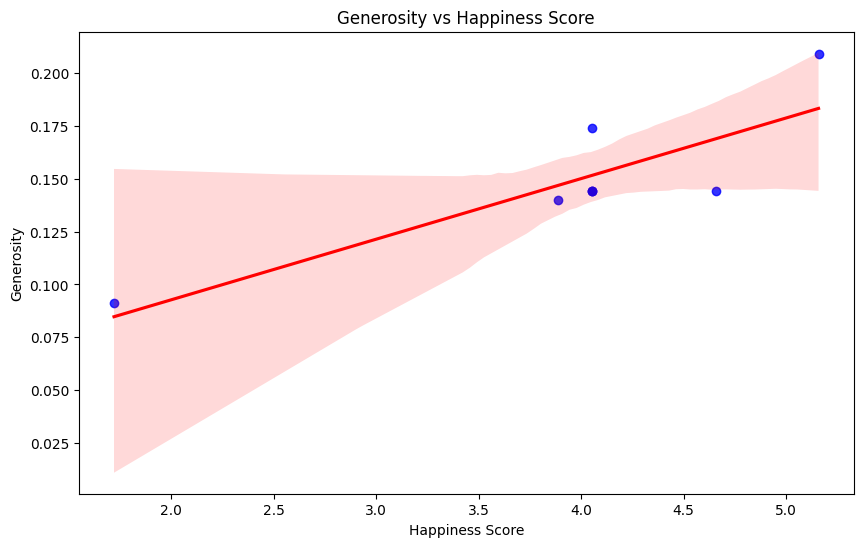

In [308]:
plt.figure(figsize=(10,6))
sb.regplot(data=whr_sa_sorted, x='score', y='Generosity', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')

In [309]:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country
whr_sa_gapped = whr_sa_sorted.copy()
whr_sa_gapped['GDP Score Gap'] = whr_sa_sorted['Log GDP per capita'] - whr_sa_sorted['score']
whr_sa_gapped.transpose()


,0,2,5,6,7,1,3,4
Country name,Nepal,India,Bhutan,Maldives,Srilanka,Pakistan,Bangladesh,Afghanistan
score,5.158,4.054,4.054,4.054,4.054,4.657,3.886,1.721
Log GDP per capita,0.965,1.166,1.069,1.069,1.069,1.069,1.122,0.628
Social support,0.99,0.653,0.6,0.6,0.6,0.6,0.249,0.0
Healthy life expectancy,0.443,0.417,0.417,0.417,0.417,0.321,0.513,0.242
Freedom to make life choices,0.653,0.767,0.653,0.653,0.653,0.542,0.775,0.0
Generosity,0.209,0.174,0.144,0.144,0.144,0.144,0.14,0.091
Perceptions of corruption,0.115,0.122,0.115,0.115,0.115,0.074,0.167,0.088
Dystopia + residual,1.783,0.756,0.919,0.919,0.919,1.907,0.919,0.672
Happiness_Category,Medium,Medium,Medium,Medium,Medium,Medium,Low,Low


In [310]:
# Rank the South Asian countries by this gap in both ascending and descending order.
whr_sa_gapped_asc = whr_sa_gapped.sort_values('GDP Score Gap',ascending=True)
whr_sa_gapped_dsc = whr_sa_gapped.sort_values('GDP Score Gap',ascending=False)

display(whr_sa_gapped_asc)
display(whr_sa_gapped_dsc)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
5,Bhutan,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
6,Maldives,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP Score Gap
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
5,Bhutan,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
6,Maldives,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


Text(0.5, 1.0, 'Bar chart of the countries with the least and most GDP Score Gap ')

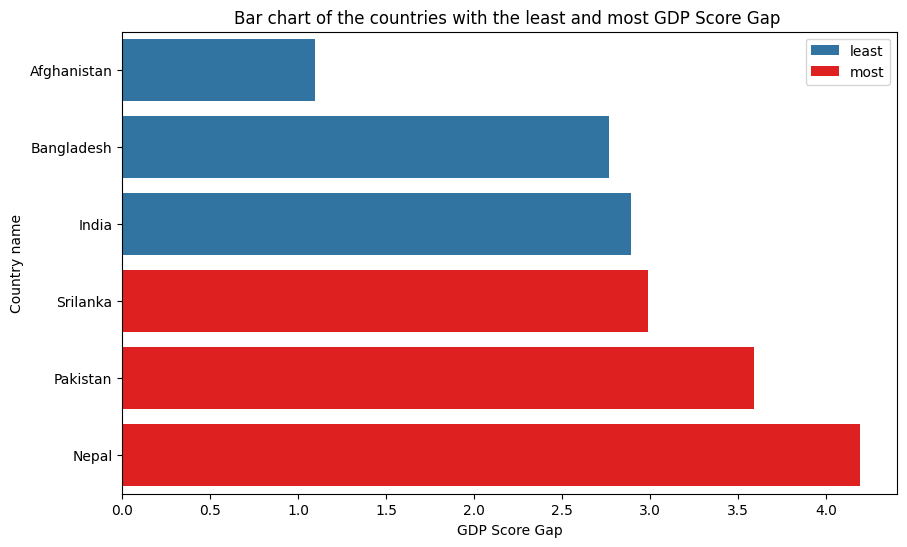

In [311]:
# Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

plt.figure(figsize=(10,6))
whr_sa_gapped_dsc['GDP Score Gap'] = whr_sa_gapped_dsc['GDP Score Gap'].abs()
sb.barplot(data=whr_sa_gapped_dsc.head(3), y='Country name', x='GDP Score Gap', label = 'least')
sb.barplot(data=whr_sa_gapped_dsc.tail(3), y='Country name', x='GDP Score Gap', color='red',label = 'most')

plt.title("Bar chart of the countries with the least and most GDP Score Gap ")


In [312]:
# Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
middle_eastern_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
me_daf = whr_daf_categorized.query('`Country name` in @middle_eastern_countries')
# me_daf.isna().sum() // Shows no missing


missing_countries = [country for country in middle_eastern_countries if country not in me_daf['Country name'].values]

numeric_columns = me_daf.select_dtypes(include=['float64']).columns
happiness_category_mode = me_daf['Happiness_Category'].mode()[0]


for country in missing_countries:
    median_values = me_daf[numeric_columns].median()
    new_row = median_values.to_dict()
    new_row['Country name'] = country
    new_row['Happiness_Category'] = happiness_category_mode
    new_row_df = pd.DataFrame([new_row])

    me_daf = pd.concat([me_daf, new_row_df], ignore_index=True)

me_daf
me_daf.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,5.455071,1.473679,1.172536,0.555321,0.578429,0.139321,0.144536,1.441821
std,1.305064,0.328182,0.220213,0.096573,0.187109,0.050831,0.058561,0.641766
min,2.707000,0.671000,0.577000,0.293000,0.173000,0.059000,0.029000,-0.073000
25%,4.983750,1.390625,1.143000,0.551125,0.467000,0.119625,0.121125,1.203875
50%,5.562500,1.433250,1.200750,0.559500,0.617000,0.138750,0.147500,1.692750
75%,6.435250,1.711000,1.270125,0.569000,0.641000,0.150000,0.184000,1.777750
max,7.341000,1.983000,1.513000,0.740000,0.827000,0.235000,0.258000,2.298000


In [313]:
# Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

print("South asian:")
display(whr_sa['score'].agg(['mean','std']))

print("Middle eastern:")
display(me_daf['score'].agg(['mean','std']))

South asian:


,score
mean,3.954750
std,0.998194


Middle eastern:


,score
mean,5.455071
std,1.305064


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP Score Gap,Region
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193,South Asian
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588,South Asian
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888,South Asian
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985,South Asian
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764,South Asian
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093,South Asian


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Region
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High,Middle Eastern
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High,Middle Eastern
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High,Middle Eastern
7,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium,Middle Eastern
8,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low,Middle Eastern
9,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low,Middle Eastern


<Axes: xlabel='Country name', ylabel='score'>

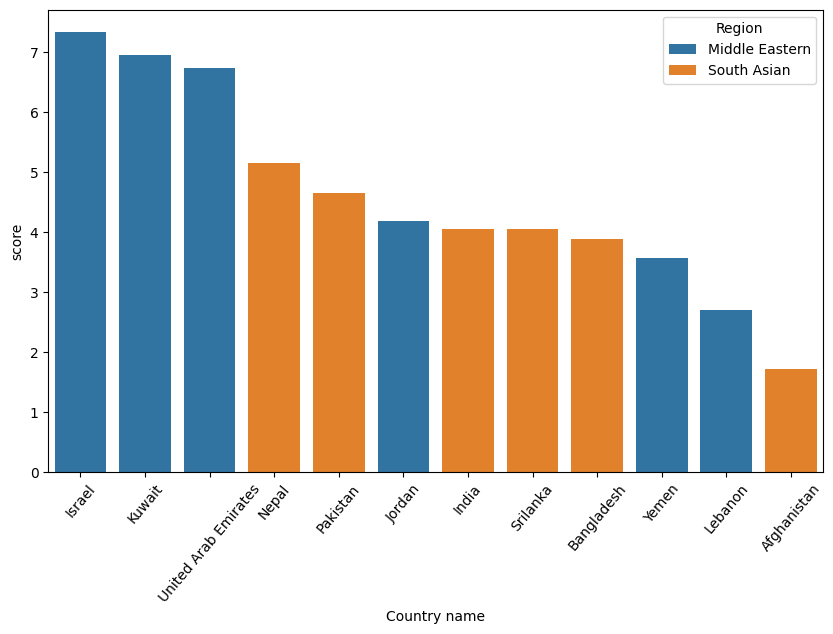

In [314]:
#  Identify the top 3 and bottom 3 countries in each region based on the score.
sa_daf = whr_sa_gapped.sort_values('score',ascending=False)
sa_daf['Region'] = 'South Asian'
me_daf = me_daf.sort_values('score',ascending=False)
me_daf['Region'] = 'Middle Eastern'

top_bot_sa = pd.concat([sa_daf.head(3),sa_daf.tail(3)]).drop_duplicates()

top_bot_me = pd.concat([me_daf.head(3),me_daf.tail(3)]).drop_duplicates()

display(top_bot_sa,top_bot_me)


top_bot = pd.concat([top_bot_sa,top_bot_me])
top_bot = top_bot.sort_values(by='score',ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=50)
sb.barplot(data=top_bot, x='Country name',y='score',hue='Region',)


,0
Log GDP per capita,0.586688
score,2.026875
Healthy life expectancy,0.187562
Social support,0.682813


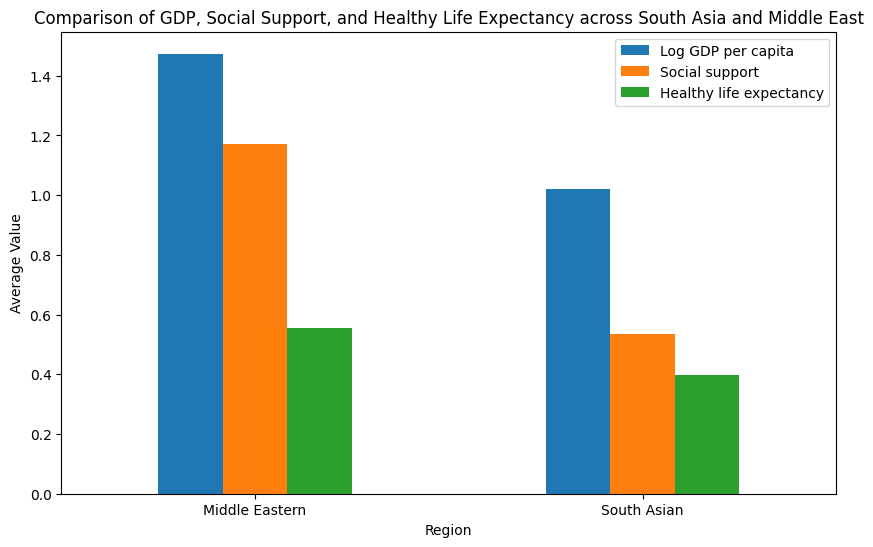

In [315]:
 #Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

combined_df = pd.concat([sa_daf, me_daf])
grouped_df = combined_df.groupby('Region')[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

south_asian = combined_df[combined_df['Region'] == "South Asian"].select_dtypes(include='number')
middle_eastern = combined_df[combined_df['Region'] == "Middle Eastern"].select_dtypes(include='number')

# Perform the subtraction

grouped_df.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.title('Comparison of GDP, Social Support, and Healthy Life Expectancy across South Asia and Middle East')
plt.xticks(rotation=0)


region_diff = -south_asian + middle_eastern
region_diff.mean()[['Log GDP per capita','score','Healthy life expectancy','Social support']]

In [316]:
# Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

def calc_cv_range(data, region_name):
    score_max = data['score'].max()
    score_min = data['score'].min()
    score_mean = data['score'].mean()
    score_std = data['score'].std()

    score_range = score_max - score_min
    score_cv = (score_std / score_mean) * 100

    return pd.Series({'Region': region_name, 'Range': score_range, 'CV (%)': score_cv})

sa_r_cv= calc_cv_range(sa_daf, 'South Asia')
me_r_cv= calc_cv_range(me_daf, 'Middle East')

combined_r_cv= pd.DataFrame([sa_r_cv,me_r_cv])
combined_r_cv



,Region,Range,CV (%)
0,South Asia,3.437,25.240372
1,Middle East,4.634,23.923870


In [317]:
# Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
things = ['score', 'Freedom to make life choices', 'Generosity']

sa_corr = sa_daf[things].corr()
me_corr = me_daf[things].corr()

print("south asian: ")
display(sa_corr['score'])
print("middle eastern: ")
display(me_corr['score'])

south asian: 


,score
score,1.000000
Freedom to make life choices,0.797314
Generosity,0.858518


middle eastern: 


,score
score,1.000000
Freedom to make life choices,0.863386
Generosity,0.619213


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP Score Gap,Region
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193,South Asian
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588,South Asian
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888,South Asian
5,Bhutan,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985,South Asian
6,Maldives,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985,South Asian
7,Srilanka,4.054,1.069,0.600,0.417,0.653,0.144,0.115,0.919,Medium,0.7327,-2.985,South Asian
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764,South Asian
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093,South Asian


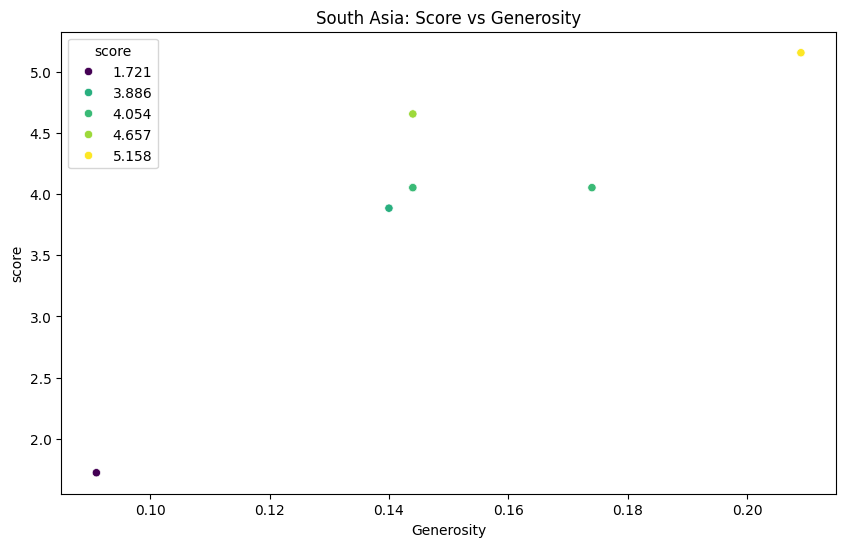

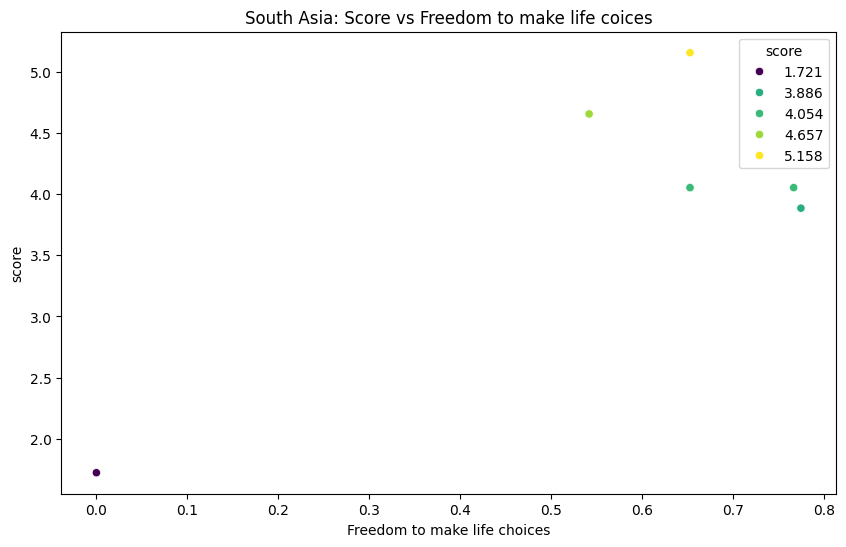

In [318]:
# Create scatter plots to visualize and interpret the relationships
display(sa_daf)
plt.figure(figsize=(10,6))
plt.title('South Asia: Score vs Generosity')
sb.scatterplot(data=sa_daf,x='Generosity',y='score',hue='score',palette='viridis')
plt.show()
plt.figure(figsize=(10,6))
plt.title('South Asia: Score vs Freedom to make life coices')
sb.scatterplot(data=sa_daf,x='Freedom to make life choices',y='score',hue='score',palette='viridis')
plt.show()




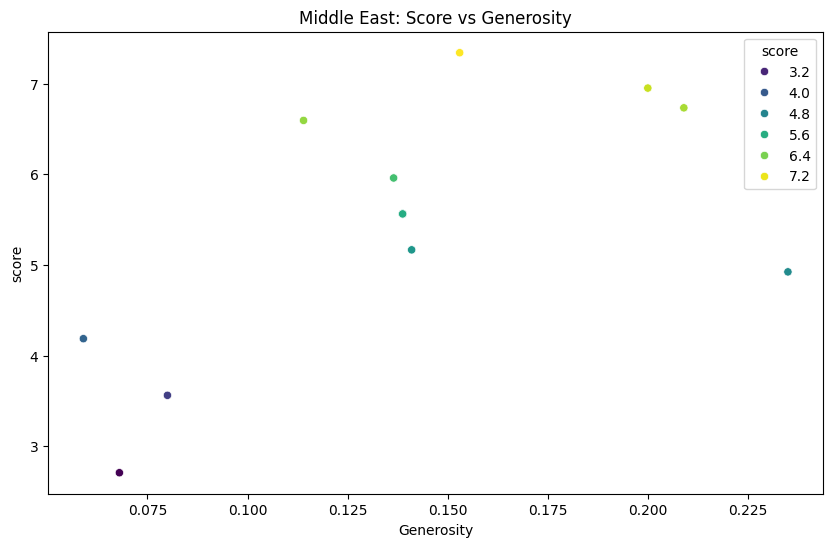

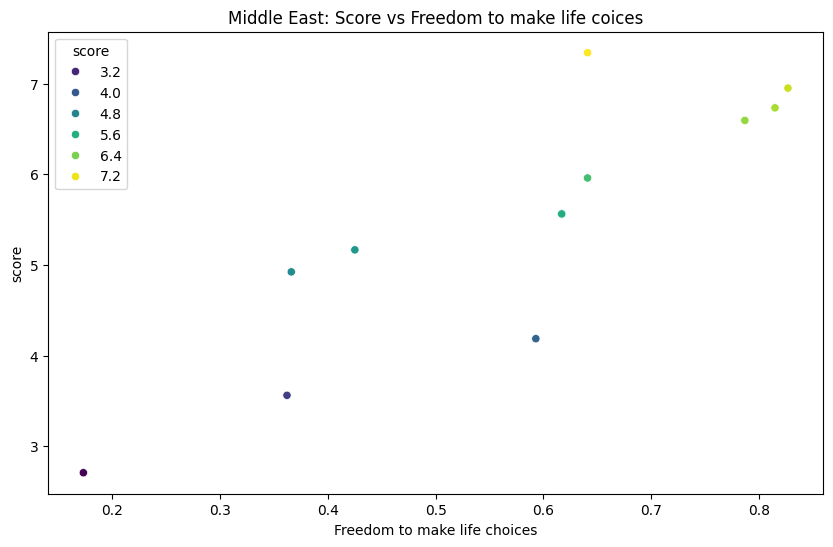

<Axes: title={'center': 'Correlation Heatmap'}>

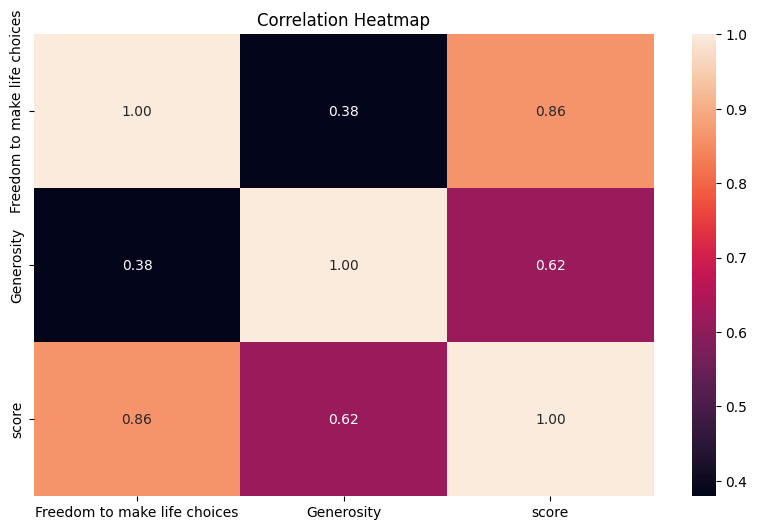

In [319]:
# Create scatter plots to visualize and interpret the relationships
plt.figure(figsize=(10,6))
plt.title('Middle East: Score vs Generosity')
sb.scatterplot(data=me_daf,x='Generosity',y='score',hue='score',palette='viridis')
plt.show()
plt.figure(figsize=(10,6))
plt.title('Middle East: Score vs Freedom to make life coices')
sb.scatterplot(data=me_daf,x='Freedom to make life choices',y='score',hue='score',palette='viridis')
plt.show()

m_correl = me_daf[['Freedom to make life choices', 'Generosity', 'score']].corr()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=0)
plt.title('Correlation Heatmap')
sb.heatmap(m_correl, annot=True,  fmt=".2f")

In [320]:
# Identify outlier countries in both regions based on Score and GDP per Capita.

sa_outliers= find_outliers(sa_daf, ['score', 'Log GDP per capita'])
sa_outliers_daf = sa_daf.query('`Country name` in @sa_outliers')
me_outliers= find_outliers(me_daf, ['score', 'Log GDP per capita'])
me_outliers_daf = me_daf.query('`Country name` in @me_outliers')
display(sa_outliers_daf)
display(me_outliers_daf)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP Score Gap,Region
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193,South Asian
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588,South Asian
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888,South Asian
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093,South Asian


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Region
8,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low,Middle Eastern
9,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low,Middle Eastern


Text(0.5, 1.0, 'Scatter plot of outliers of both regions')

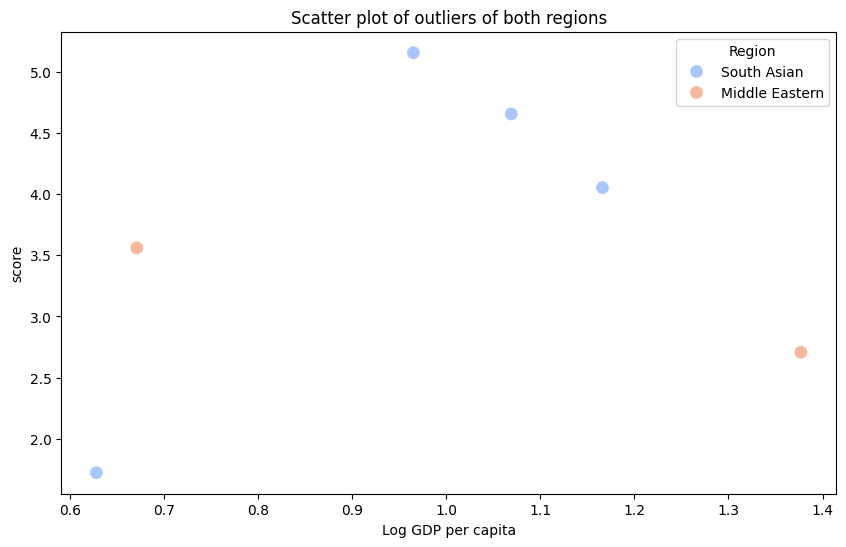

In [333]:
# Plot these outliers and discuss their implications
combined_outliers= pd.concat([sa_outliers_daf, me_outliers_daf])
plt.figure(figsize=(10, 6))
sb.scatterplot(data=combined_outliers, x='Log GDP per capita', y='score', hue='Region', palette='coolwarm', s=100, legend='full')
plt.title("Scatter plot of outliers of both regions")

Text(0.5, 1.0, 'Box plot of the distribution of the Happiness Score amongst the regions')

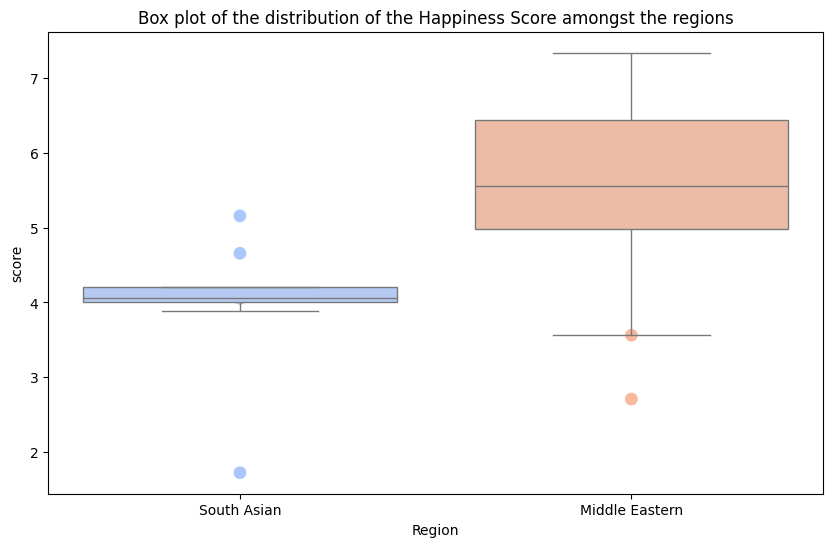

In [341]:
# 1. Create boxplots comparing the distribution of Score between South Asia and the Middle East
combined_df = pd.concat([sa_daf, me_daf])
plt.figure(figsize=(10, 6))
sb.boxplot(data=combined_df, x='Region', y='score', palette='coolwarm', hue='Region', showfliers=False)
sb.scatterplot(data=combined_outliers, x='Region', y='score', hue='Region', palette='coolwarm', s=100, legend=None)
plt.title('Box plot of the distribution of the Happiness Score amongst the regions')


In [351]:
# outlier_names = combined_outliers['Country name']
# # display(outlier_names)
# combined_no_outliers = combined_df.query("`Country name` not in @outlier_names")
#
# plt.figure(figsize=(10, 6))
# sb.boxplot(data=combined_no_outliers, x='Region', y='score', palette='coolwarm', hue='Region', showfliers=False)
# plt.title('Box plot of the distribution of the Happiness Score amongst the regions')
#